# StatsModels 패키지의 ARMA 모형 클래스

StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

| 클래스 이름   | 용도        |
| ------------- |-------------|
| `ArmaProcess` | 미리 정해진 계수를 가진 ARMA 모형 |
| `ARMA`        | 주어진 자료에서 계수를 추정하기 위한 ARMA 모형 |
| `ARMAResults` | 주어진 자료에서 추정된 ARMA 모형  |

## `ArmaProcess` 클래스 사용법

`ArmaProcess` 클래스는 정해진 모형 계수를 가진 ARMA 모형을 특성을 분석하기 위한 클래스이다.

### 모형 생성

| 클래스 이름   | 용도 |
| ------------- |------|
| `ArmaProcess` | AR, MA 계수 행렬에서 ARMA 모형 생성 |
| `ArmaProcess.from_estimation()` | 추정된 ARMAResults 에서 ARMA 모형 생성 |

계수로부터 ARMA 모형을 만드는 경우에는 `ArmaProcess`를 직접 사용한다. 단, 계수의 부호는 다음 수식을 기준으로 한다. AR 계수의 부호가 일반적인 ARMA 모형과 다를 수 있다.


$$  \phi(L) Y_t = \mu + \psi(L) \varepsilon_t  $$
  

$$
\begin{eqnarray}
  \phi(L) &= 1 + a_1 L + a_2 L^2 + \cdots a_p L^p \\
  \psi(L) &= 1 + b_1 L + b_2 L^2 + \cdots b_q L^q
\end{eqnarray}
$$


$$  Y_t = -a_1 Y_{t-1} - a_2 Y_{t-2} \cdots - a_p Y_{t-p} + \mu + \varepsilon_t + b_1 \varepsilon_{t-1} + b_2 \varepsilon_{t-2} + \cdots b_q \varepsilon_{t-q} $$


다음은 `ArmaProcess` 를 사용하는 예제이다. 여기에서는 다음과 같은 ARMA(2,2) 모형을 생성한다. 
현재의 시점에서 Y_{t-1} 의 계수는 0.75로 크고 더 과거로 갈수록 계수는 적다 (현재에 영향을 미치는 백색잡음에 대해 가중계수를 크게 줌) 

$$   Y_t = 0.75 Y_{t-1} - 0.25 Y_{t-2} + \varepsilon_t + 0.65 \varepsilon_{t-1} + 0.35 \varepsilon_{t-2}  $$


In [5]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = sm.tsa.ArmaProcess(ar, ma)
print(type(m))

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


### 샘플 시계열 생성

| 메서드, 속성 이름 | 용도 |
|--|--|
| `generate_sample()` | 주어진 ARMA 모형에서 나올 수 있는 시계열을 무작위로 생성 |

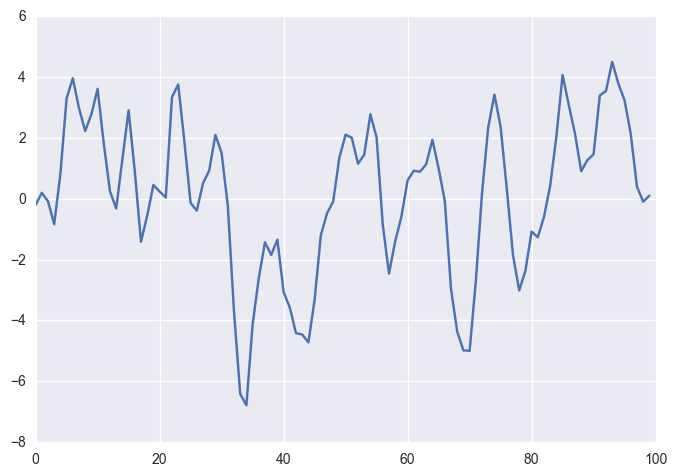

In [6]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

### 특성 분석

| 메서드, 속성 이름 | 	용도 |
|--|--|
| `isstationary` |  	모형 안정성(stability) |
| `isinvertible` | 	모형 가역성(invertibility) |
| `acovf()` | 	이론적인 자기 공분산(autocovariance) 값 |
| `acf()` | 	이론적인 자기 상관계수(autocorrelation) 값 |
| `pacf()` | 	이론적인 자기 편상관계수(partial autocorrelation) 값 |

True
True


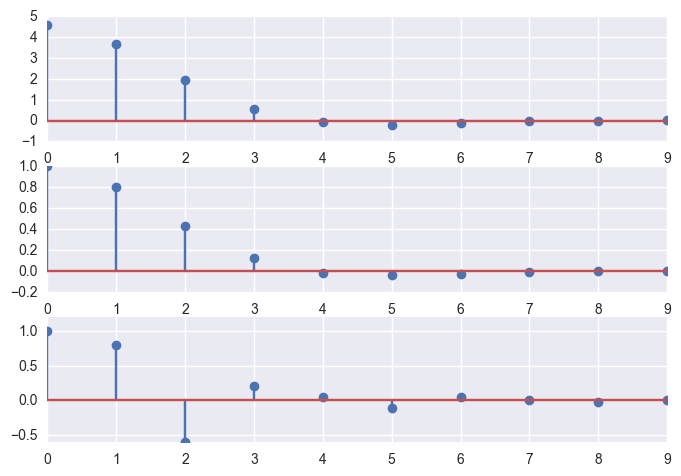

In [7]:
print(m.isstationary)
print(m.isinvertible)
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

## 처음0번과 1번의 상관관계는 0.8로 크다. 2,3,4,로 갈수록 상관관계가 적다 

## `ARMA` 및 `ARMAResults` 클래스 사용법 (estimation 설명할때 수업) 

`ARMA` 및 `ARMAResults` 클래스는 미리 계수가 정해진 이론적 모형이 아니라 주어진 자료로부터 모형을 추정할 때 사용하는 클래스이다. 사용 방법은 다음과 같다.


1. 우선 주어진 자료와 차수를 입력변수로 `ARMA` 객체를 생성하고
2. `ARMA.fit()` 메서드를 사용하여 추정결과를 `ARMAResults` 클래스 객체로 출력한다.


In [8]:
m2 = sm.tsa.ARMA(x, (2, 2)) ## ARMA 차수 2 
print(type(m2))
r = m2.fit(disp=False)
print(type(r))
print(r.summary())

<class 'statsmodels.tsa.arima_model.ARMA'>
<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Fri, 04 Nov 2016   AIC                            300.462
Time:                        05:58:54   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.17

`ARMA` 클래스 객체는 모델과 자료에 관한 정보를 다음과 같은 속성값에 나누어 저장한다.

| 속성 이름 | 	용도 | 
|--|--|
|`endog` |  	원자료 |
|`endog_names` |  	원자료 변수명 |

`ARMAResults` 클래스 객체는 추정 결과 정보를 다음과 같은 속성값에 나누어 저장한다.

|속성/메서드 이름 |	용도 |
|-|-|
|`model`|  	추정 자료와 모형 차수 등을 가진 ARMA 클래스 객체 |
|`k_ar`|  	AR 차수 |
|`k_ma`|  	MA 차수 |
|`arparams`|  	추정된 AR 계수 |
|`maparams`|  	추정된 MA 계수 |
|`params`|  	추정된 전체 계수 (trend 계수 포함) |
|`bse`|  	추정된 전체 계수의 표준 오차 |
|`tvalues`|  	추정된 계수의 t statistics | 
|`pvalues`|  	추정된 계수의 t statistics에 대한 p value |
|`conf_int()`|  	추정된 계수의 신뢰구간 계산 |
|`llf`|  	Log Likelihood 값 |
|`aic`|  	AIC 값 |
|`bic`|  	BIC 값 |
|`hqic`|  	HQIC 값 |
|`fittedvalues`|  	추정 모형에 의한 예측값 |
|`resid`|  	추정 모형에 의한 잔차항(Residuals) |
|`sigma2`|  	추정 모형에 의한 잔차항의 분산 |

In [9]:
r.arparams ## AR 추정된 계수 

array([ 0.65927044, -0.09655685])

In [10]:
r.maparams ## MA 추정된 계수 

array([ 0.84051327,  0.50663556])

In [11]:
r.params ## 추정된 전체계수 

array([ 0.11519269,  0.65927044, -0.09655685,  0.84051327,  0.50663556])

In [12]:
r.bse ## 추정된 전체 계수의 표준 오차

array([ 0.5326167 ,  0.17061559,  0.15928805,  0.14462623,  0.10919882])

In [13]:
r.tvalues ## 추정된 계수의 t statistics

array([ 0.2162769 ,  3.86406928, -0.60617763,  5.81162401,  4.63957017])

In [14]:
r.pvalues ## p-value 

array([  8.29235644e-01,   2.03786948e-04,   5.45842536e-01,
         8.23426492e-08,   1.11581289e-05])

In [15]:
r.conf_int() ## 추정된 계수의 신뢰구간 계산

array([[-0.92871686,  1.15910224],
       [ 0.32487004,  0.99367085],
       [-0.40875569,  0.21564199],
       [ 0.55705107,  1.12397548],
       [ 0.29260982,  0.72066131]])

In [16]:
r.llf ## Log Likelihood 값

-144.2310133702841

In [17]:
r.aic

300.4620267405682

In [18]:
r.bic

316.09304785649675

In [19]:
r.hqic

306.78818225026305

In [20]:
r.sigma2 ## 추정 모형에 의한 잔차항의 분산

1.0211629247456515

In [21]:
r.fittedvalues ## fitting 된 예측된 값들

array([ 0.11519269, -0.15507026,  0.4074045 , -0.32549481, -1.12728968,
        2.01300422,  4.15862965,  2.80999898,  1.66196731,  1.78482031,
        2.77478581,  3.3608373 ,  0.01130111, -0.56146004,  0.13649941,
        2.03773311,  3.15051016, -1.09364652, -2.37881992,  1.18675751,
        0.70544452, -0.6032755 ,  0.35389399,  5.08199194,  2.59672296,
       -0.35486093, -0.40722676, -0.07335295,  0.91412445,  0.91161421,
        2.34109655,  0.72959897, -1.46840036, -4.72965904, -6.36754383,
       -5.00642204, -1.50003782, -1.76064037, -0.92362572, -1.64024799,
       -0.87929323, -3.5241609 , -3.16252245, -3.59388939, -3.82548872,
       -3.819372  , -1.72632021,  0.25874549, -0.51260491,  0.02249649,
        2.29116781,  1.82323764,  1.22221369,  0.6435458 ,  1.52794679,
        3.19042343,  0.75097735, -2.66935665, -2.12888137,  0.08842869,
       -0.40768758,  1.00974197,  1.03555464,  0.37254596,  1.27416891,
        2.15642872, -0.11340563, -0.65532922, -3.81881134, -4.16

In [22]:
r.resid ## 실제값 계수들과 예측된 계수들의 잔차 

array([-0.31990035,  0.34742287, -0.49173635, -0.51157753,  1.94332071,
        1.28494473, -0.20253082,  0.16241622,  0.5629947 ,  0.98570796,
        0.83339973, -1.55262608,  0.2277751 ,  0.24269445,  1.16261462,
        0.8622386 , -2.25224723, -0.32030573,  1.82054461, -0.73582411,
       -0.46832856,  0.64103279,  2.98521966, -1.32956526, -0.72093618,
        0.21517924,  0.01483063,  0.57788961,  0.00968395,  1.18284912,
       -0.84093968, -0.95272085, -2.23420212, -1.68382745, -0.41675341,
        0.87095744, -1.10859146,  0.33105512, -0.92510779,  0.29463329,
       -2.18300881, -0.05281819, -1.25213139, -0.86572926, -0.89326883,
        0.49223101,  0.51730472, -0.74169631,  0.4261995 ,  1.33465477,
       -0.18854392,  0.1789462 , -0.07329837,  0.80103222,  1.24442848,
       -1.17718748, -1.61625254,  0.21061513,  0.73173991, -0.68142308,
        1.01089352, -0.08962728, -0.15087846,  0.76014301,  0.66028722,
       -1.15562499,  0.03412409, -2.30839151, -0.54260235, -0.81

또한 `ARMAResults` 클래스 객체는 다음과 같은 유용한 메서드도 제공한다.

| 메서드 이름 	| 용도 |
|--|--|
|`summary()`| 	추정 결과 요약 문자열 |
|`summary2()`| 	추정 결과 요약 문자열 |
|`forecast()`| 	예측 (자료가 끝난 다음의 미래 예측, 신뢰구간 출력) |
|`predict()`| 	예측 (자료 내부의 in-sample 예측도 가능) |
|`plot_predict()`| 	예측 플롯. forecast() 결과를 시각화 |

In [23]:
r.forecast(20)[0] ## prediction 값들 

array([ 0.56132698,  0.48980507,  0.31908624,  0.21344229,  0.16027843,
        0.13542971,  0.12418102,  0.11916441,  0.11694324,  0.11596328,
        0.11553169,  0.11534178,  0.11525824,  0.11522151,  0.11520536,
        0.11519826,  0.11519514,  0.11519377,  0.11519316,  0.1151929 ])

In [24]:
r.predict(100, 120) ## 100차~120차 까지 값 예측 

array([ 0.56132698,  0.48980507,  0.31908624,  0.21344229,  0.16027843,
        0.13542971,  0.12418102,  0.11916441,  0.11694324,  0.11596328,
        0.11553169,  0.11534178,  0.11525824,  0.11522151,  0.11520536,
        0.11519826,  0.11519514,  0.11519377,  0.11519316,  0.1151929 ,
        0.11519278])

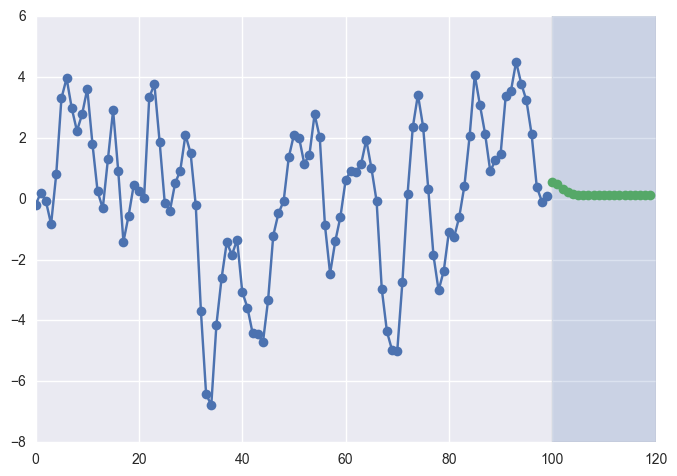

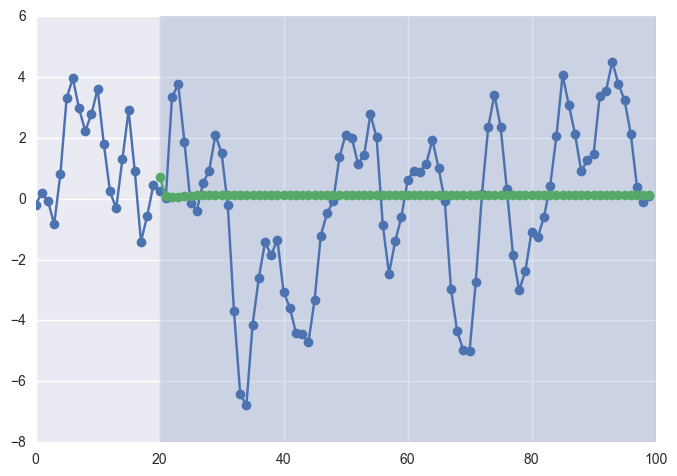

In [25]:
plt.figure(1) ## 100차~120차 까지 값 예측 (확률분포의 중심을 보여줌, 분산은 안보여줌)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[0]], marker='o'); plt.axvspan(xmin=100, xmax=120, alpha=0.2)
plt.figure(2) ## 20차~120차 까지 값 예측 (확률분포의 중심을 보여줌, 분산은 안보여줌)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 20, r.predict(20, dynamic=True)], marker='o'); plt.axvspan(xmin=20, xmax=100, alpha=0.2)
plt.show() ## ARMA 시간이 지나면 예측할수 없다라는것을 보여줌 , 1차 2차까지는 방향성을 보여주기는 함 